In [1]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt

def get_loss_files(file_location,pattern):
    lhs_batch_work_dir=file_location
    filenames=os.listdir(lhs_batch_work_dir)
    lhs_lpi_batch=pd.DataFrame()
    for i in filenames:
        if len(re.findall(pattern,i))!=0:
            data=pd.read_csv(lhs_batch_work_dir+i,index_col=0)
            lhs_lpi_batch=pd.concat([lhs_lpi_batch,data],axis=1)
    return lhs_lpi_batch

def format_data(experiment):
    #seeks runs where the training process failed
    # and removes NA values
    n_experiment=np.shape(experiment)[1]
    experiment.columns=np.arange(n_experiment)
    failed=np.where(experiment==-1)[1]
    failed=[str(i) for i in failed]

    exclude=np.setdiff1d(experiment.columns.to_list(),failed)
    experiment=experiment.filter(items=list(exclude),axis=1)

    experiment.fillna(0,inplace=True)
    n_experiment=np.shape(experiment)[1]
    print(n_experiment)
    return n_experiment,experiment

def myplot(score,coeff,labels=[None]):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [34]:



lhs_lpi_monod=get_loss_files(file_location="../results/monod/lhs/",pattern="monod_run\d_loss_per")
nrows_monod,ncols_monod=np.shape(lhs_lpi_monod)
failed_monod=np.where(lhs_lpi_monod==-1)[1]
n_lhs_lpi_monod,lhs_lpi_monod=format_data(lhs_lpi_monod)



lhs_lpi_batch=get_loss_files("../results/batch/lhs/",pattern="batch_run\d_loss_per")
nrows_batch,ncols_batch=np.shape(lhs_lpi_batch)

failed_batch=np.where(lhs_lpi_batch==-1)[1]
n_lhs_lpi_batch,lhs_lpi_batch=format_data(lhs_lpi_batch)


lhs_lpi_simple_sbml=get_loss_files("../results/simple_sbml/lhs/",pattern="simple_sbml_run\d_loss_per")
nrows_simplesbml,ncols_simplesbml=np.shape(lhs_lpi_simple_sbml)
failed_simple=np.where(lhs_lpi_simple_sbml==-1)[1]
n_lhs_lpi_simple_sbml,lhs_lpi_simple_sbml=format_data(lhs_lpi_simple_sbml)


lhs_lpi_BIOMD0000000458=get_loss_files("../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run\d_loss_per")
nrows_BIOMD0000000458,ncols_BIOMD0000000458=np.shape(lhs_lpi_BIOMD0000000458)
failed_BIOMD0000000458=np.where(lhs_lpi_BIOMD0000000458==-1)[1]
n_lhs_lpi_BIOMD0000000458,lhs_lpi_BIOMD0000000458=format_data(lhs_lpi_BIOMD0000000458)


500
206
100
111


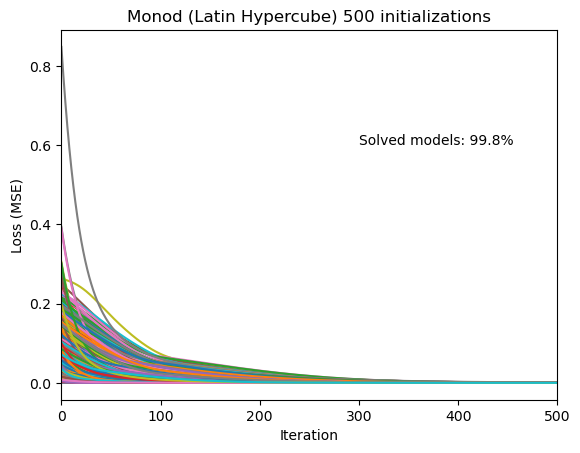

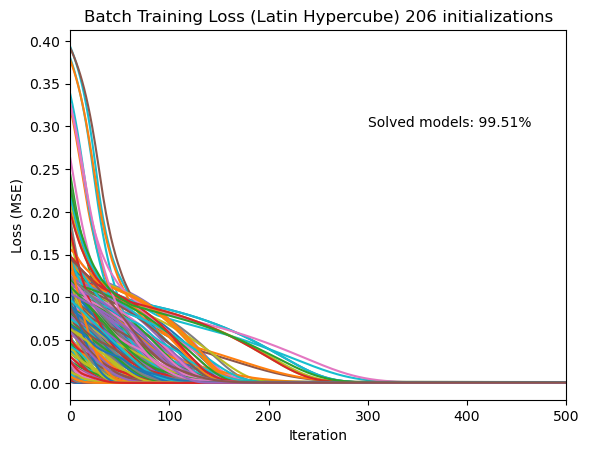

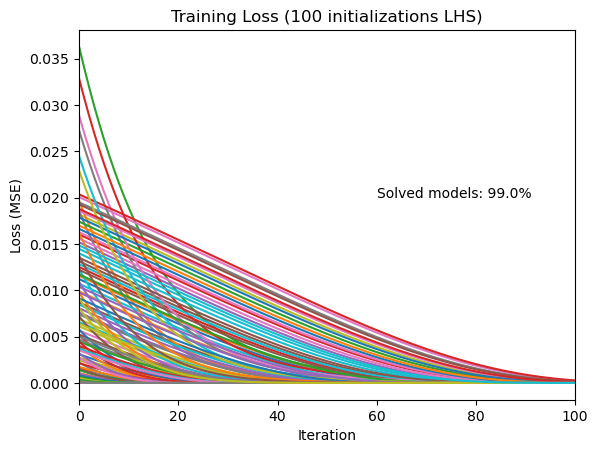

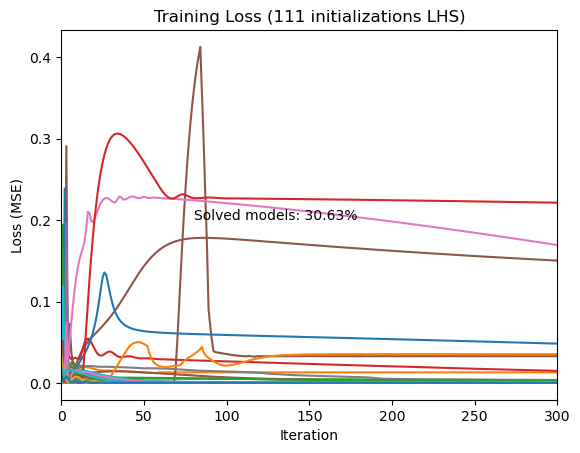

In [35]:
fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_monod)[1]):
    ax.plot(lhs_lpi_monod.iloc[:,i])#$, color=plt.cm.Reds(i))

succeeded=np.sum(lhs_lpi_monod.iloc[nrows_monod-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/n_lhs_lpi_monod*100,2)

annotation="Solved models: "+str(succeeded)+ "%"
plt.title("Monod (Latin Hypercube) "+ str(n_lhs_lpi_monod)+" initializations")
plt.xlabel("Iteration")
plt.xlim(0,500)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(300,0.6))
plt.show()




fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_batch)[1]):
    ax.plot(lhs_lpi_batch.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_batch.iloc[N_iter_batch-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/n_lhs_lpi_batch*100,2)

annotation="Solved models: "+str(succeeded)+ "%"
# plt.title("Batc (Latin Hypercube) "+ str(n_lhs_lpi_monod)+" initializations")
plt.title("Batch Training Loss (Latin Hypercube) "+ str(n_lhs_lpi_batch)+" initializations")
plt.xlabel("Iteration")
plt.xlim(0,500)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(300,0.3))
plt.show()

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_simple_sbml)[1]):
    ax.plot(lhs_lpi_simple_sbml.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_simple_sbml.iloc[N_iter_simple-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/n_lhs_lpi_simple_sbml*100,2)
annotation="Solved models: "+str(succeeded)+ "%"
plt.title("Training Loss ("+ str(n_lhs_lpi_simple_sbml)+" initializations LHS)")
plt.xlabel("Iteration")
plt.xlim(0,100)
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(60,0.02))
plt.show()

fig,ax=plt.subplots()
for i in range(np.shape(lhs_lpi_BIOMD0000000458)[1]):
    ax.plot(lhs_lpi_BIOMD0000000458.iloc[:,i])#, color=plt.cm.Reds(i),linewidth=3,alpha=1)
succeeded=np.sum(lhs_lpi_BIOMD0000000458.iloc[N_iter_BIOMD0000000458-1:,:]==0)#/np.shape(uniform_lpi_monod))[1]
succeeded=np.round(np.sum(list(succeeded))/n_lhs_lpi_BIOMD0000000458*100,2)
annotation="Solved models: "+str(succeeded)+ "%"
plt.title("Training Loss ("+ str(n_lhs_lpi_BIOMD0000000458)+" initializations LHS)")
plt.xlabel("Iteration")
plt.xlim(0,300)
# plt.yscale("symlog")
plt.ylabel("Loss (MSE)")
plt.annotate(annotation,xy=(80,0.2))
plt.show()

In [4]:
111/500


0.222

In [18]:
params_lpi_monod=get_loss_files(file_location="../results/monod/lhs/",pattern="monod_run\d_optim")
# all_params=params_lpi_monod.iloc[0:9,:]
print(np.shape(params_lpi_monod))

from sklearn.decomposition import PCA
pca_monod=PCA(n_components=2)
x_monod=pca_monod.fit_transform(params_lpi_monod.T)

params_lpi_batch=get_loss_files(file_location="../results/batch/lhs/",pattern="batch_run\d_optim")
params_lpi_batch.drop(params_lpi_batch.columns[failed_batch],axis=1)
print(np.shape(params_lpi_batch))
# all_params=all_params.drop(all_params.columns[[28,29]],axis=1)

from sklearn.decomposition import PCA


pca_batch=PCA(n_components=2)
x_batch=pca_batch.fit_transform(params_lpi_batch.T)

params_lpi_BIOMD0000000458=get_loss_files(file_location="../results/BIOMD0000000458/lhs/",pattern="BIOMD0000000458_run\d_optim")
succeeded=list(np.sum(lhs_lpi_BIOMD0000000458.iloc[N_iter_BIOMD0000000458-1:,:]==0).keys())
params_lpi_BIOMD0000000458=params_lpi_BIOMD0000000458.iloc[:,succeeded]
params_lpi_BIOMD0000000458=params_lpi_BIOMD0000000458.dropna(axis=1)
pca_BIOMD0000000458=PCA(n_components=2)
x_BIOMD0000000458=pca_BIOMD0000000458.fit_transform(params_lpi_BIOMD0000000458.T)



(9, 500)
(4, 395)


0.165

0.8528429836099531
0.9067908072112644
0.711231202810357


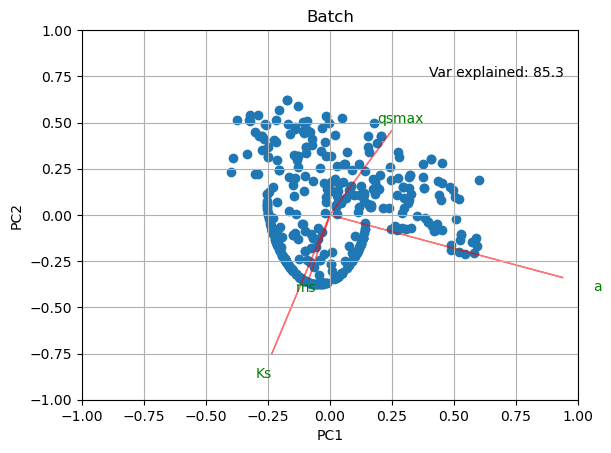

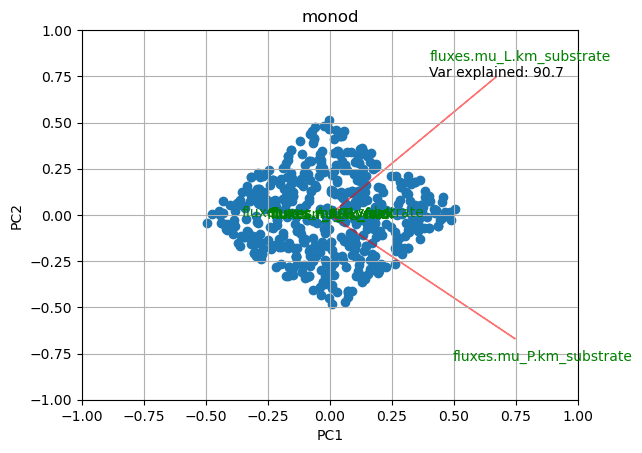

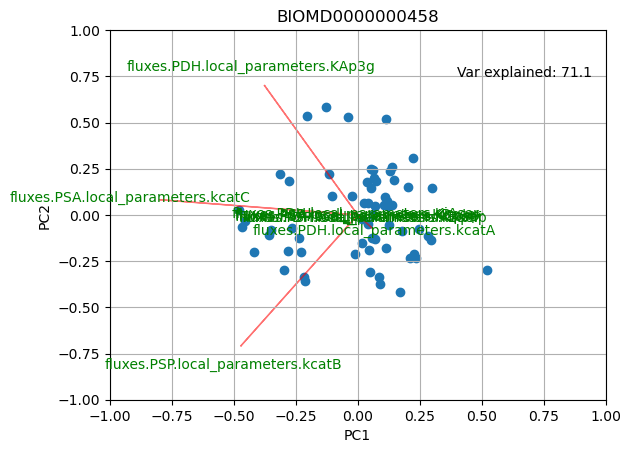

In [19]:
print(sum(pca_batch.explained_variance_ratio_))
print(sum(pca_monod.explained_variance_ratio_))
print(sum(pca_BIOMD0000000458.explained_variance_ratio_))


def myplot(score,coeff,labels,title,var_explained):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1]*1.15 , "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.title(title)
    plt.annotate("Var explained: "+str(np.round(var_explained,3)*100),xy=(0.4,0.75))
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


var_explained_batch=sum(pca_batch.explained_variance_ratio_)
var_explained_monod=sum(pca_monod.explained_variance_ratio_)
var_explained_BIOMD0000000458=sum(pca_BIOMD0000000458.explained_variance_ratio_)

myplot(score=x_batch[:,0:2],
       coeff=np.transpose(pca_batch.components_[0:2, :]),
       labels=list(params_lpi_batch.index),
       title="Batch",
       var_explained=var_explained_batch)
plt.show()

myplot(score=x_monod[:,0:2],
       coeff=np.transpose(pca_monod.components_[0:2, :]),
       labels=list(params_lpi_monod.index),
       title="monod",
       var_explained=var_explained_monod)
plt.show()


myplot(score=x_BIOMD0000000458[:,0:2],
       coeff=np.transpose(pca_BIOMD0000000458.components_[0:2, :]),
       labels=list(params_lpi_BIOMD0000000458.index),
       title="BIOMD0000000458",
       var_explained=var_explained_BIOMD0000000458)
plt.show()
# myplot(x_monod[:,0:2],np.transpose(pca_monod.components_[0:2, :]),labels=list(params_lpi_monod.index))



In [90]:
len(succeeded)/200


0.245

In [258]:
x_new[:,2]

TypeError: 'PCA' object is not subscriptable

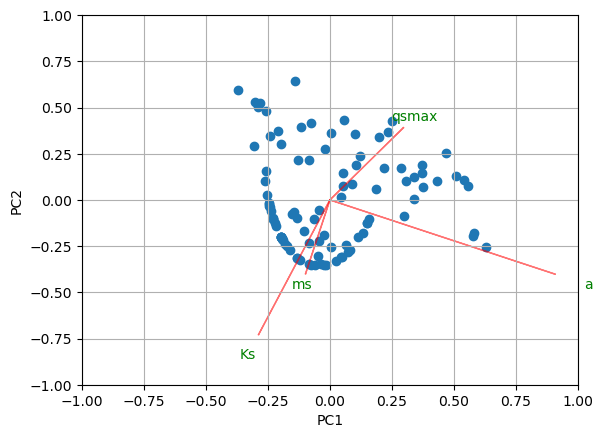

In [301]:

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),labels=list(params_lpi_batch.index))
plt.show()



In [300]:
params_lpi_batch.index

Index(['qsmax', 'Ks', 'a', 'ms'], dtype='object')